In [101]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [102]:
import matplotlib.pyplot as plt
import os
import dateutil
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [103]:
def plot_memory(df):
    plt.plot(df["Time_in_s"], df["Memory"])
    plt.xlabel("Second")
    plt.xticks(rotation=30)
    plt.ylabel("Memory")
    plt.show()


In [104]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def get_relative_time(df):
    initial_value = df['Time_in_s'].iloc[0]
    df['time_datetime'] = df['Time_in_s'].apply(lambda x: int(x - initial_value))
    return df 

def plot_pods_memory(data_directory):
    df_mem = []
    fig, ax1 = plt.subplots()
    ax1.set_title(f"Memory usage")
    ax1.set_xlabel("Second")
    ax1.set_ylabel("Memory (MiB)")
    ax1.set_xlim(0,100)
    
    for i, pod in enumerate(os.listdir(data_directory)):
        if not pod.startswith("epi-bf"):
            continue
            
        
        df_mem_pod_n = plot_mem_per_pods_and_fix_timestamps(data_directory, pod, i, ax1)
        df_mem.append(df_mem_pod_n)

    fig.tight_layout()
    plt.show()

    old_max = 0
    df_mem_total = None
        
def plot_mem_per_pods_and_fix_timestamps(data_directory, pod, i, ax):
    
    colors = ["orange", "green", "blue", "indigo", "brown"]
    
    f_name = f"{data_directory}/" + pod        
    df = pd.read_csv(f_name, delimiter=",")
    df = df.iloc[5:]
    df = df.reset_index()
    # Convert values 
    df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
    df = get_relative_time(df)
    df = df.set_index("time_datetime")
    # Locust has zero point
#     df["Time_in_s"] = df["Time_in_s"] - start_point
    # cpu is in nanosecond so dive by 1000 is microsecond divide by 100 is milicore
    df["Memory"] = (df["Memory"] / 1024) / 1024
    #np.gradient(df["Memory"])
    
    plot_mem_per_pod(df, pod, ax)
    
    return df

def plot_mem_per_pod(df, pod, ax):

    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    try:
        pod_name = pod.split(".")[0]
#         ax.plot(df["Time_in_s"],df["Memory"], label=f"Memory {pod_name}")
        ax.plot(df.index,df["Memory"], label=f"Memory {pod_name}")
#         ax.plot(df["Time"],df["Memory"], label=f"Memory {pod_name}")
        ax.legend(loc="upper left")
    except:
        print("Couldn't handle that.")

NUMBER_OF_USERS 10, Test_no 1


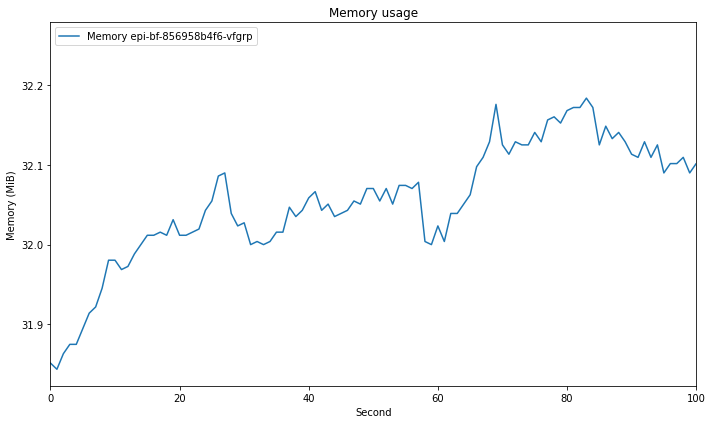

NUMBER_OF_USERS 100, Test_no 2


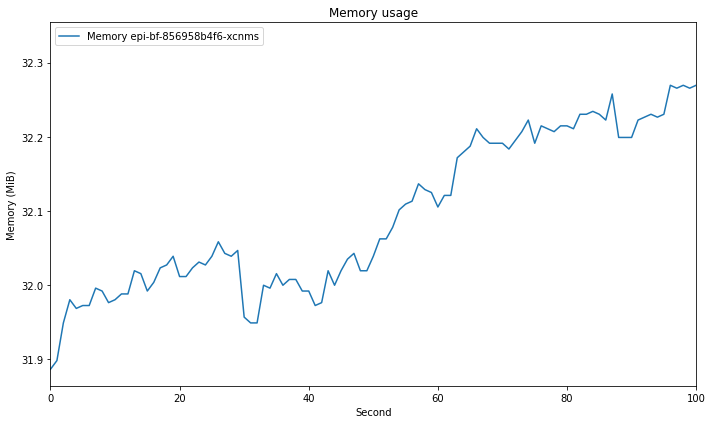

NUMBER_OF_USERS 1000, Test_no 3


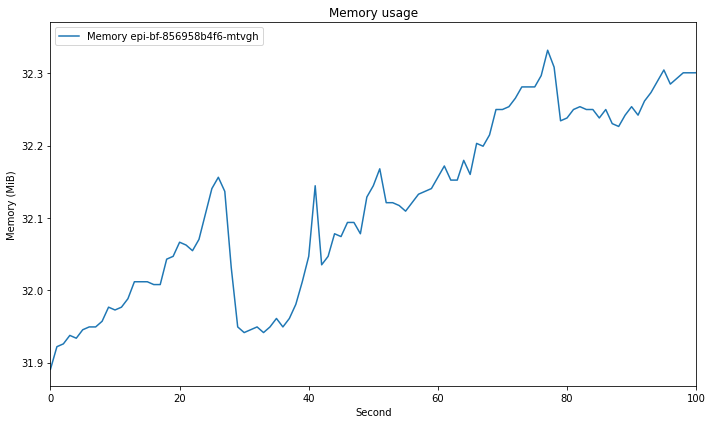

NUMBER_OF_USERS 10000, Test_no 4


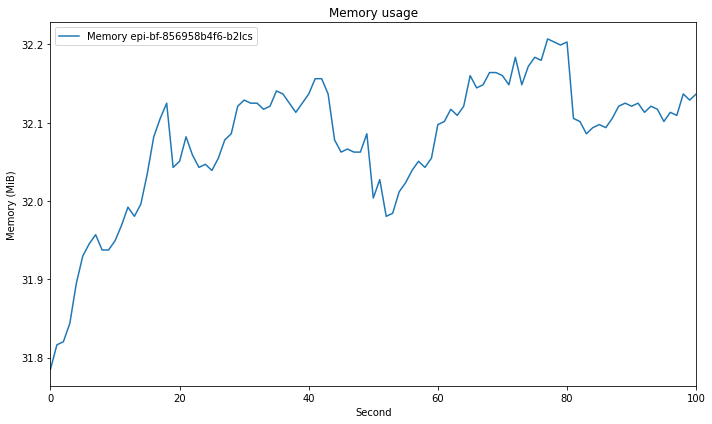

In [105]:
colors = ["r", "g", "b", "orange", "yellow", "brown"]
main_data_dir="../hpa_test_data_memory"
df_experiment = pd.read_csv("../usecases_test_vars_memory.csv")


for number_of_users in df_experiment["NO_OF_USERS"].drop_duplicates():
    df_number_of_users = df_experiment[df_experiment["NO_OF_USERS"] == number_of_users]
    fails = {}
    avg_response_50 = {}
    avg_response_95 = {}
    avg_response_50_mean = {}
    avg_response_95_mean = {}
    avg_cpu_overhead = {}
    number_of_pods = {}
    times = {}
    indexes = []
    
    
    for test_number in df_number_of_users["TEST_NO"]:
        df_number = df_number_of_users[df_number_of_users["TEST_NO"] == test_number]

        test_dir = f"TEST_NO_{test_number}"
         
#         if test_number != 1:
#             continue
    
        data_directory = f"{main_data_dir}/{test_dir}"
        
      
        print(f"NUMBER_OF_USERS {number_of_users}, Test_no {test_number}")

        plot_pods_memory(data_directory)
      
    bar_width = 0.25
    start = 0.5
    offset = 0.25